
Made by: Andrei Kulchyk (155489) and Fiodar Piatrovich (155174)

[Github](https://github.com/aaakulchyk/put-evolutionary-computations)

# Description of a problem

We are given three columns of integers with a row for each node. The first two columns contain x and y coordinates of the node positions in a plane. The third column contains node costs. The goal is to select exactly 50% of the nodes (if the number of nodes is odd we round the number of nodes to be selected up) and form a Hamiltonian cycle (closed path) through this set of nodes such that the sum of the total length of the path plus the total cost of the selected nodes is minimized.

The distances between nodes are calculated as Euclidean distances rounded mathematically to
integer values. The distance matrix should be calculated just after reading an instance and then only
the distance matrix (no nodes coordinates) should be accessed by optimization methods to allow
instances defined only by distance matrices.

In [1]:
# %load_ext autoreload
# %autoreload 2

In [5]:
import random
from pathlib import Path

import numpy as np
import pandas as pd

from hamiltonian_cycle.experiment import perform_experiment
from hamiltonian_cycle.algorithms.lab3_4 import LocalSearch
from hamiltonian_cycle.algorithms.lab1 import init_random_solution
from hamiltonian_cycle.costs import dm

In [6]:
def read_dataset_csv(csv_path: Path) -> pd.DataFrame:
    return pd.read_csv(csv_path, sep=";", names=["x", "y", "cost"])


DATA_DIR = Path("../data").resolve()

ds_a = read_dataset_csv(DATA_DIR / "TSPA.csv")
ds_b = read_dataset_csv(DATA_DIR / "TSPB.csv")

dm_a = dm(ds_a)
dm_b = dm(ds_b)

# Local Search with candidate moves

$$
\begin{aligned}
&\textbf{Function local\_search}(dataset, distance\_matrix, initial\_solution, strategy, intra\_search, use\_heuristic): \\
&\quad \text{Set the solution as the initial solution} \\
&\quad \text{Identify selected nodes and non-selected nodes} \\
&\quad \textbf{Loop until no improvement can be found}: \\
&\quad \quad \text{Search for intra-route neighbors based on intra\_search type (node or edge).} \\
&\quad \quad \quad \text{If strategy is "greedy", take first giving improvement.} \\
&\quad \quad \quad \text{If use\_heuristic, limit search to candidate nodes.} \\
&\quad \quad \text{Search for inter-route neighbors between solution nodes and non-selected nodes.} \\
&\quad \quad \quad \text{If use\_heuristic, limit non-selected search to candidate nodes.} \\
&\quad \quad \quad \text{If strategy is "greedy", take first giving improvement.} \\
&\quad \quad \text{Combine intra-route and inter-route neighbors into all\_neighbors} \\
&\quad \quad \textbf{If there are no improving neighbors}: \\
&\quad \quad \quad \text{Exit the loop} \\
&\quad \quad \textbf{If strategy is "greedy"}: \\
&\quad \quad \quad \text{Shuffle neighbors to get randomly either inter or intra neighbor} \\
&\quad \quad \textbf{Else If strategy is "steepest"}: \\
&\quad \quad \quad \text{Choose the neighbor with the steepest improvement} \\
&\quad \quad \text{Update solution, selected nodes, and non-selected nodes based on best neighbor} \\
&\quad \textbf{Return} \text{the final solution as a subset of the dataset}
\end{aligned}
$$

In [7]:
local_search = LocalSearch(
    strategy="steepest",
    intra_search="edge",
    use_candidates_heurtistic=True,
    debug_mode=False,
)


def init_local_search(ds, dm, i):
    initial_solution = list(init_random_solution(ds, dm, 0).index)
    return local_search(ds, dm, initial_solution)

#### Results on Dataset A

Best solution: [152, 189, 94, 167, 55, 57, 129, 92, 91, 179, 145, 78, 31, 113, 175, 171, 16, 25, 44, 120, 2, 172, 52, 185, 40, 90, 165, 106, 178, 138, 14, 144, 49, 102, 62, 9, 148, 15, 114, 89, 183, 76, 23, 137, 51, 176, 80, 122, 79, 133, 151, 72, 59, 118, 65, 116, 43, 42, 115, 139, 68, 46, 0, 143, 117, 93, 140, 108, 18, 22, 159, 193, 41, 181, 34, 160, 54, 30, 10, 177, 184, 84, 4, 112, 127, 123, 162, 135, 154, 180, 158, 53, 182, 63, 97, 101, 75, 86, 26, 1]
Objective function statistics:
minimum = 76566
mean = 83201.29
maximum = 93668


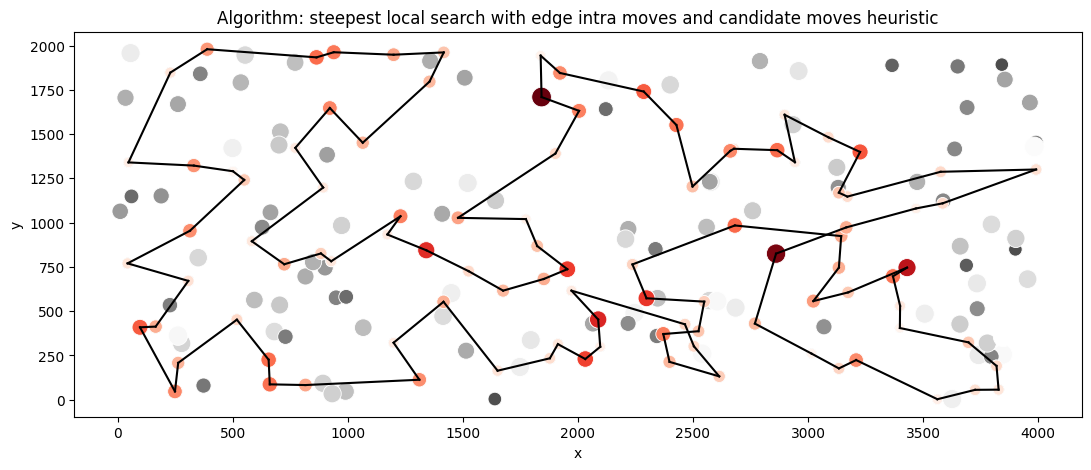

In [8]:
perform_experiment(
    ds_a,
    dm_a,
    "Algorithm: steepest local search with edge intra moves and candidate moves heuristic",
    init_local_search,
)

#### Results on Dataset B

Best solution: [35, 0, 29, 168, 195, 13, 132, 169, 188, 134, 74, 118, 98, 51, 147, 71, 90, 122, 133, 44, 107, 40, 63, 135, 131, 121, 1, 198, 117, 193, 31, 54, 164, 73, 136, 190, 80, 162, 175, 142, 5, 177, 36, 61, 91, 141, 21, 82, 8, 104, 56, 160, 33, 49, 138, 11, 139, 145, 15, 70, 3, 155, 152, 34, 55, 18, 62, 95, 183, 140, 4, 149, 28, 20, 148, 47, 94, 172, 179, 185, 86, 166, 194, 176, 88, 113, 114, 127, 103, 163, 124, 106, 153, 97, 77, 81, 14, 111, 37, 109]
Objective function statistics:
minimum = 49463
mean = 54430.4
maximum = 61502


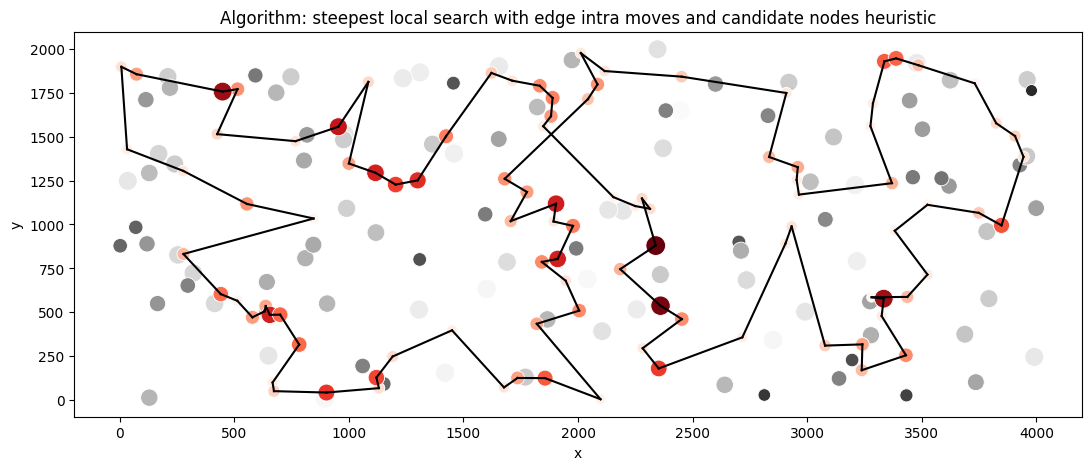

In [10]:
perform_experiment(
    ds_b,
    dm_b,
    "Algorithm: steepest local search with edge intra moves and candidate nodes heuristic",
    init_local_search,
)

# Summary

In [11]:
a_res = pd.DataFrame(
    {
        "random_cycle_edge_steepest": [72046, 74033.715, 78801, 9.54],
        "random_cycle_edge_candidate_heur": [76566, 83201.29, 93668, 1.23],
    },
    index=pd.MultiIndex.from_tuples(
        [
            ("Dataset A", "min"),
            ("Dataset A", "mean"),
            ("Dataset A", "max"),
            ("Dataset A", "seconds/iter"),
        ]
    ),
).T

b_res = pd.DataFrame(
    {
        "random_cycle_edge_steepest": [45393, 48264.78, 50697, 9.02],
        "random_cycle_edge_candidate_heur": [49463, 54430.4, 61502, 1.27],
    },
    index=pd.MultiIndex.from_tuples(
        [
            ("Dataset B", "min"),
            ("Dataset B", "mean"),
            ("Dataset B", "max"),
            ("Dataset B", "seconds/iter"),
        ]
    ),
).T

a_res.join(b_res).sort_values(by=("Dataset A", "mean"))

Dataset A                                   \
                                       min       mean      max seconds/iter   
random_cycle_edge_steepest         72046.0  74033.715  78801.0         9.54   
random_cycle_edge_candidate_heur   76566.0  83201.290  93668.0         1.23   

                                 Dataset B                                  
                                       min      mean      max seconds/iter  
random_cycle_edge_steepest         45393.0  48264.78  50697.0         9.02  
random_cycle_edge_candidate_heur   49463.0  54430.40  61502.0         1.27

# Conclusion

`Candidate moves` heuristic improves significantly the computation time, but at cost of quality, the drop there is rather significant.